## Plotting script for the gas network

NOTE: Nodes in output either correspond to physical node or gnodes. Gnodes have their own numbering, thus, with those output, they must first be converted to physical node numberings.

In [24]:
import json
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import numpy as np
import random

In [25]:
# Open the JSON file
# with open('data/40-node-baseline/network.json', 'r') as file:
with open('data/40-node-counter/network.json', 'r') as file:
# with open('data/8-node/network.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

    # Access the "nodes" dictionary
    nodes = data['nodes']

    y_coords = []
    x_coords = []
    node_id_num = []

    # Iterate through the nodes dictionary
    for node_id, node_data in nodes.items():
        # Check if the node_data contains "y_coord" and "x_coord"
        if 'y_coord' in node_data and 'x_coord' in node_data:
            # Get the numerical value of "y_coord" and "x_coord"
            y_coord_value = node_data['y_coord']
            x_coord_value = node_data['x_coord']
            node_id_value = node_data['node_id']

            # Append the values to the respective lists
            y_coords.append(y_coord_value)
            x_coords.append(x_coord_value)
            node_id_num.append(node_id_value)

    # Print the y_coord and x_coord values
    print("y_coords:", y_coords)
    print("x_coords:", x_coords)
    print("node_id:", node_id_num)

    # Access the "pipes" dictionary
    pipes = data['pipes']

    to_nodes = []
    from_nodes = []
    pipe_id_num = []

    # Iterate through the pipes dictionary
    for pipe_id, pipe_data in pipes.items():
        # Check if the node_data contains "y_coord" and "x_coord"
        if 'to_node' in pipe_data and 'from_node' in pipe_data:
            # Get the numerical value of "y_coord" and "x_coord"
            to_node_value = pipe_data['to_node']
            from_node_value = pipe_data['from_node']
            pipe_id_value = pipe_data['pipe_id']

            # Append the values to the respective lists
            to_nodes.append(to_node_value)
            from_nodes.append(from_node_value)
            pipe_id_num.append(pipe_id_value)
    
    # Access the "pipes" dictionary
    comps = data['compressors']

    # Iterate through the compressors dictionary
    for comp_id, comp_data in comps.items():
        # Check if the node_data contains "y_coord" and "x_coord"
        if 'to_node' in comp_data and 'from_node' in comp_data:
            # Get the numerical value of "y_coord" and "x_coord"
            to_node_value = comp_data['to_node']
            from_node_value = comp_data['from_node']
            pipe_id_value = comp_data['comp_id']

            # Append the values to the respective lists
            to_nodes.append(to_node_value)
            from_nodes.append(from_node_value)
            pipe_id_num.append(pipe_id_value)

    # Print the y_coord and x_coord values
    print("to_nodes:", to_nodes)
    print("from_nodes:", from_nodes)
    print("pipe_id:", pipe_id_num)

    inj = data['receipt']
    wdw = data['delivery']
    com = data['compressors']
    inj_id_num = []
    wdw_id_num = []
    com_id_num = []

    for inj_id, inj_data in inj.items():
        if 'node_id' in inj_data:
            inj_id_value = inj_data['node_id']
            inj_id_num.append(inj_id_value)
    for wdw_id, wdw_data in wdw.items():
        if 'node_id' in wdw_data:
            wdw_id_value = wdw_data['node_id']
            wdw_id_num.append(wdw_id_value)
    # for com_id, com_data in com.items():
    #     if 'comp_id' in com_data:
    #         com_id_value = com_data['comp_id']
    #         com_id_num.append(com_id_value)
    # print("comp_id:", com_id_num)

y_coords: [7.1514568006, 6.40592572072, 8.46216553204, 6.98540104932, 7.44437553119, 6.73248116159, 8.94117028284, 8.583339554, 7.37537769742, 7.17535860736, 6.70412987914, 7.39141172381, 8.42123710095, 7.06050754884, 7.44570784066, 6.68272868748, 6.97077467828, 8.90117691783, 6.89011537273, 7.16001963256, 8.52297468917, 9.43465849075, 7.53102691462, 6.03796563153, 8.9997279305602, 6.83756607565, 7.29728251758, 6.07663431277, 7.01216228711, 6.99100680564, 7.33432182486, 7.12595044104, 7.22930308682, 8.22677735937, 8.56821772295, 6.61723223779, 6.55671455828, 6.64669590696, 6.48271145481, 8.52259820008]
x_coords: [47.7026244783, 48.8791502097, 48.6811671875, 48.9965039215, 46.9361991326, 48.459701438, 49.7403095041, 49.3334858508, 47.0633496609, 48.4488696592, 47.0460984698, 47.0380264306, 48.6971572817, 47.3369727255, 48.5215554511, 47.7185810751, 48.885442716, 49.97568273333, 48.5065941308, 47.443686524, 49.5990665066, 48.4333749364, 48.5489388283, 48.8195473681, 49.7619017195, 48.963

In [26]:
# Read data from JSON file
CARBON_OFFSET = 0.055
with open('output/40-node-counter/CASE1_physical.json', 'r') as file:
    data = json.load(file)

# Store "node_concentration" values in a Python array
node_concentration_values = list(data["node_concentration"].items())
compressor_concentration_values = list(data["compressor_concentration"].items())
pressure_values = list(data["pressure"].items())
withdrawal_values = list(data["withdrawal_energy"].items())
ci_values = list(data["carbon_intensity"].items())
calorific_values = list(data["node_calorific"].items())
decarb_values = list(data["node_decarbpremium"].items())

# Convert withdrawal gnode numbering to physical node numbering
key_mapping = {str(i+1) : str(wdw_id_num[i]) for i in range(len(wdw_id_num))}
updated_withdrawal_values = [(key_mapping[key], value) for key, value in withdrawal_values]
key_mapping = {str(i+1) : str(wdw_id_num[i]) for i in range(len(wdw_id_num))}
updated_ci_values = [(key_mapping[key], value) for key, value in ci_values]

# Print the arrays
print("node_concentration_values:", node_concentration_values)
print("compressor_concentration_values:", compressor_concentration_values)
print("pressure_values:", pressure_values)

with open('output/40-node-counter/CASE1_shadowprice.json', 'r') as file:
    data = json.load(file)

# Store "lambdas" values in a Python array
lambdaH2_values = list(data["λjH2"].items())
lambdaNG_values = list(data["λjNG"].items())
lambdaT_values = list(data["λjT"].items())      # in terms of energy!

# Print the arrays
print("lambdaH2_values:", lambdaH2_values)
print("lambdaNG_values:", lambdaNG_values)

node_concentration_values: [('5', 0.09999883797089286), ('35', 0.09999880574817721), ('20', 0.09999875414177044), ('16', 0.09999883797089287), ('12', 0.0999988057481772), ('24', 0.099998977202856), ('28', 0.09999883797089286), ('8', 0.099998977202856), ('17', 0.09999880574817721), ('37', 0.09999880574817722), ('1', 0.09999883797089287), ('23', 0.09999880574817724), ('32', 0.09999880574817721), ('22', 0.0999988057481772), ('6', 0.09999883797089287), ('19', 0.09999883797089286), ('11', 0.09999883797089287), ('36', 0.09999880574817722), ('30', 0.09999875414177044), ('31', 0.099998977202856), ('9', 0.09999880574817724), ('14', 0.09999883797089287), ('3', 0.09999883797089286), ('39', 0.09999875414177044), ('29', 0.09999875414177044), ('33', 0.09999880574817721), ('25', 0.09999880574817721), ('7', 0.09999875414177044), ('40', 0.09999883797089285), ('34', 0.09999880574817722), ('4', 0.09999883797089286), ('13', 0.09999883797089287), ('15', 0.09999875414177044), ('2', 0.09999883797089286), ('2

In [ ]:
decarb_values_MJ = []
for i in range(len(node_concentration_values)):
    decarb_values_MJ.append(decarb_values[i][1] / calorific_values[i][1])
for i in range(len(decarb_values)):
    tupped = tuple((decarb_values[i][0], decarb_values_MJ[i]))
    decarb_values[i] = tupped

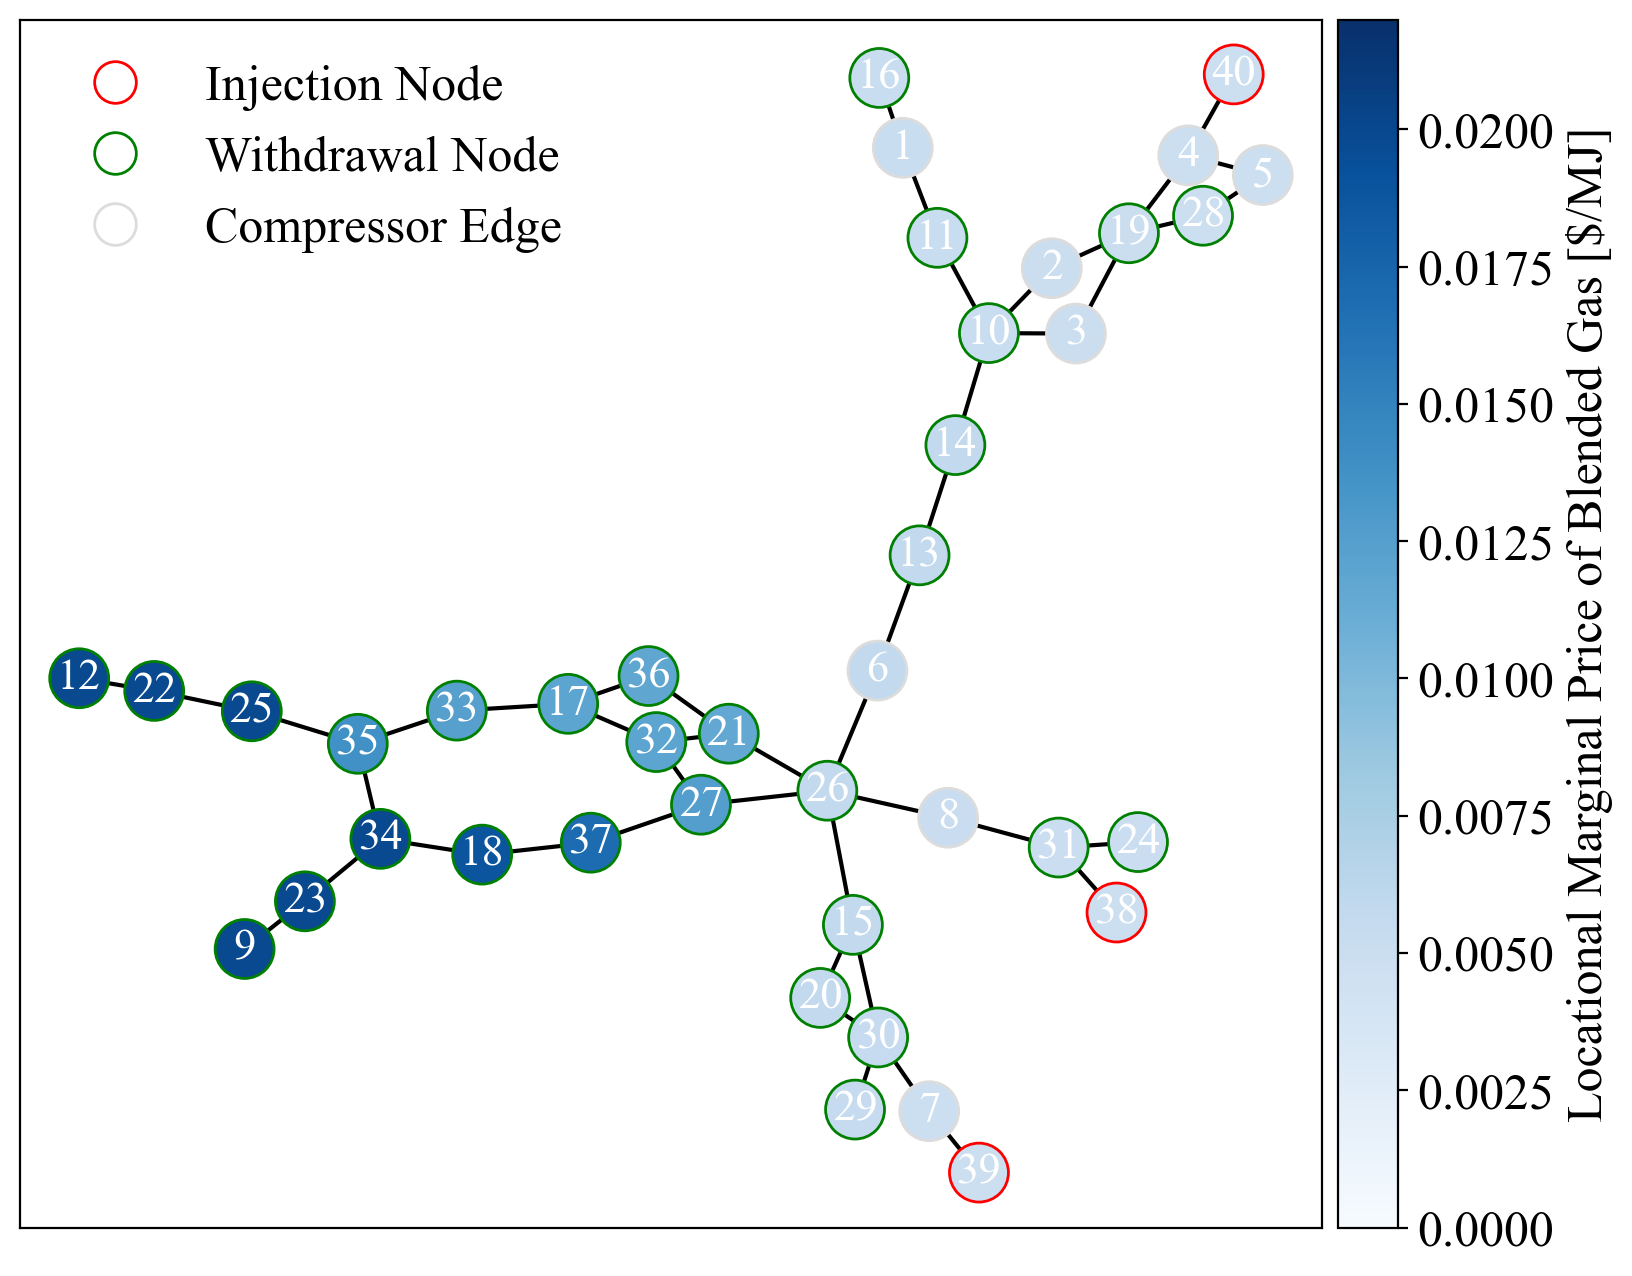

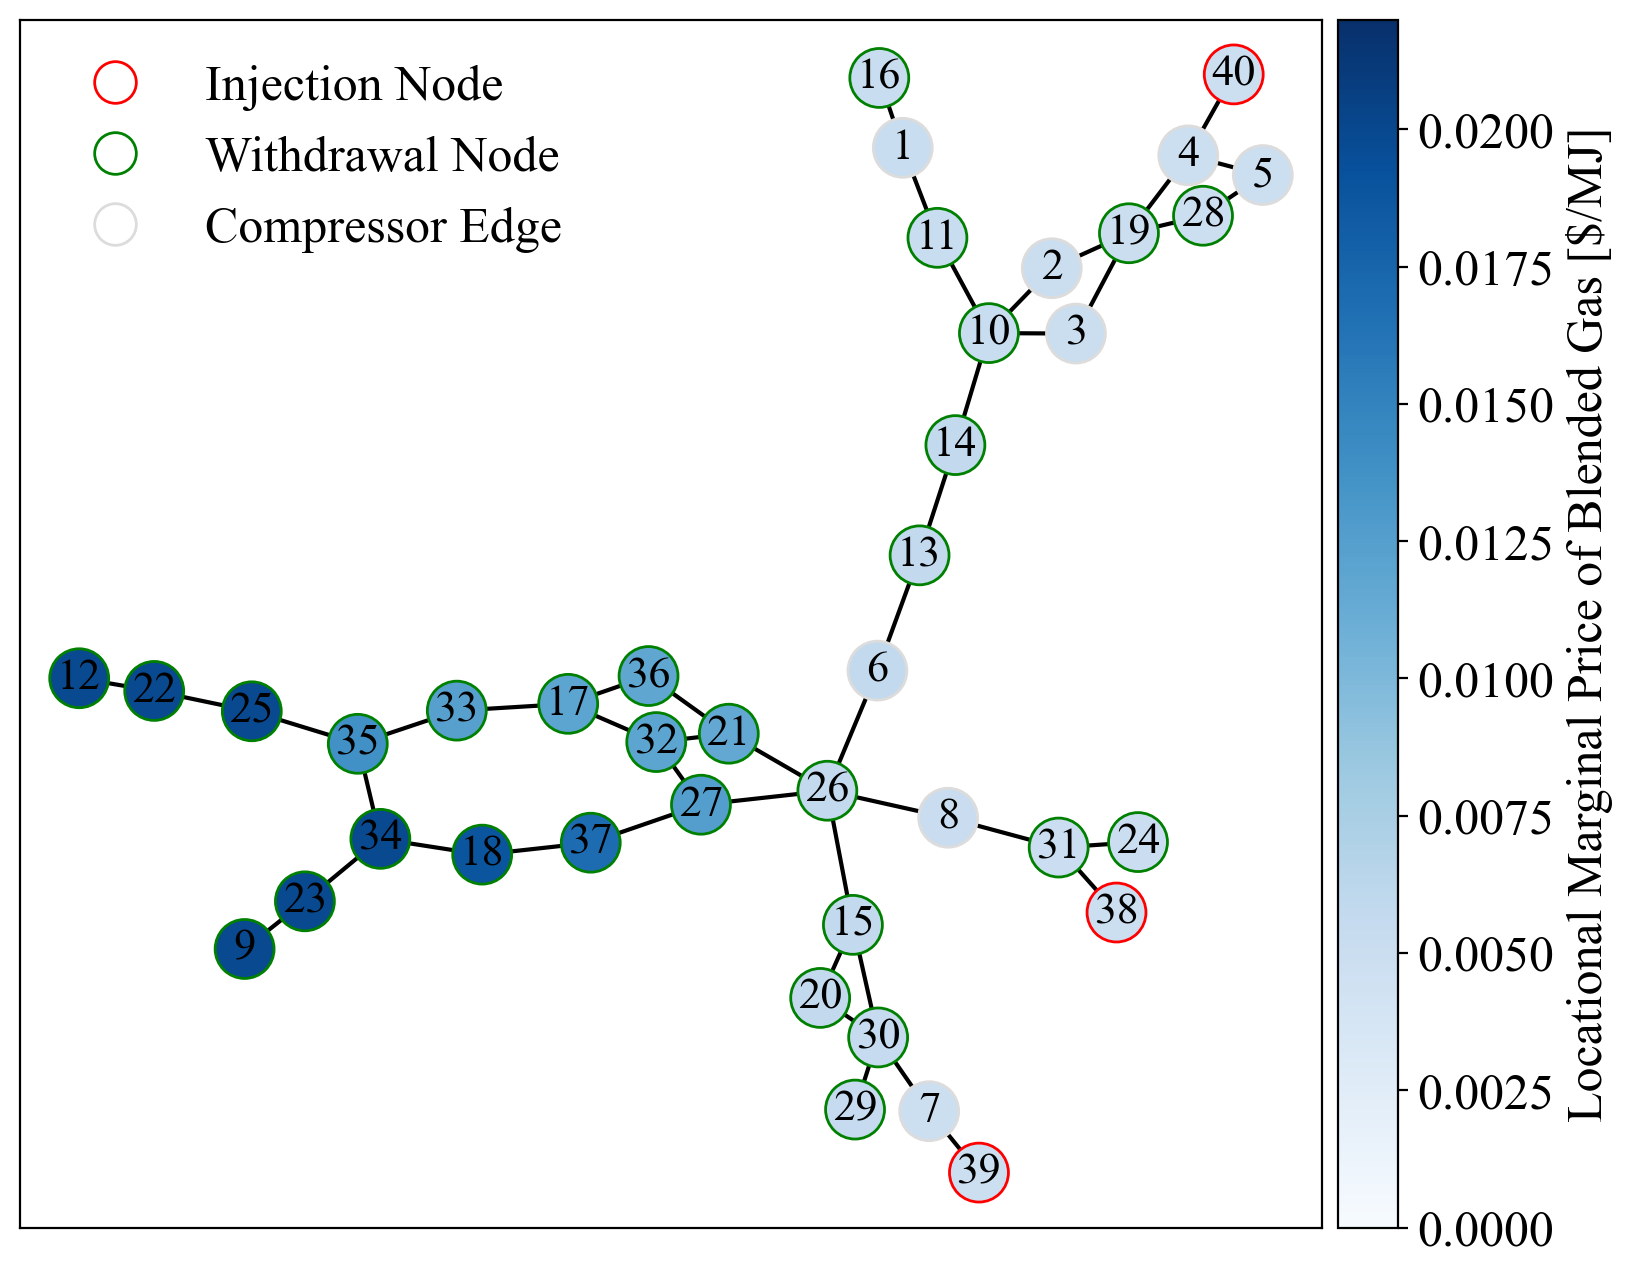

In [27]:
plot_of = "t"
limv = 0.022
lowv = 0

# Create an empty graph
G = nx.Graph()
lnl = ""
# Add nodes with x and y coordinates
if plot_of == "h2":
    get_value = lambdaH2_values
    lbl = "Locational Marginal Price of Hydrogen [$/kg]"
    cmap = plt.colormaps['Blues']
elif plot_of == "ng":
    get_value = lambdaNG_values
    lbl = "Locational Marginal Price of Natural Gas [$/kg]"
    cmap = plt.colormaps['Blues']
elif plot_of == "t":
    get_value = lambdaT_values
    lbl = "Locational Marginal Price of Blended Gas [$/MJ]"
    cmap = plt.colormaps['Blues']
    limv = 0.022
elif plot_of == "p":
    get_value = pressure_values
    lbl = "Pressure [MPa]"
    cmap = plt.colormaps['Reds']
    limv = 6e6
    lowv = 3e6
elif plot_of == "c":
    get_value = node_concentration_values
    lbl = "Node Concentration [-]"
    cmap = plt.colormaps['YlOrBr']
elif plot_of == "w":
    get_value = updated_withdrawal_values
    lbl = "Withdrawal Energy [MJ/s]"
    cmap = plt.colormaps['YlGnBu']
    limv = 1600
elif plot_of == "ci":
    get_value = updated_ci_values
    lbl = "Carbon Intensity [kgCO2/MJ]"
    cmap = plt.colormaps['YlGnBu']
elif plot_of == "cv":
    get_value = calorific_values
    lbl = "Calorific Value [MJ/kg]"
    cmap = plt.colormaps['YlOrBr']
elif plot_of == "dc":
    get_value = decarb_values
    lbl = "Decarbonization Premium [$/MJ]"
    cmap = plt.colormaps['GnBu']

val_mapping = dict(get_value)
for idx in range(len(y_coords)):
    node_id = node_id_num[idx]
    get_value = val_mapping.get(str(node_id), 0)
    if plot_of == "dc":
        node_conc = get_value
        get_value_CV =  141.8 * node_conc + 44.2 * (1-node_conc)
        get_value = (CARBON_OFFSET * node_conc * (141.8/44.2) * (44/16)) / get_value_CV
        print(get_value)
    G.add_node(node_id, pos=(x_coords[idx], y_coords[idx]), value=get_value, num=node_id)

# Get the positions of the nodes
pos = nx.get_node_attributes(G, 'pos')

# Add edges
edges = zip(from_nodes, to_nodes)
G.add_edges_from(edges)

# Create a color map based on node values
color_map = [G.nodes[node]['value'] for node in G.nodes]

# # Normalize the color values to be in the range [0, 1]
# normalized_values = [(value - min(color_map)) / (max(color_map) - min(color_map)) for value in color_map]
# rgba_colors = [cmap(value) for value in normalized_values]

# Assign colors to specific nodes
node_colors = {}
for inj in inj_id_num:
    node_colors[inj] = 'red' 
for wdw in wdw_id_num:
    node_colors[wdw] = 'green'  

# Apply the Fruchterman-Reingold layout
pos = nx.spring_layout(G, pos=pos, k=0.19)
pos[20] = [ 0.04241875, -0.480147512]
pos[38] = [ 0.45929371, -0.36198503]
pos[36] = [-0.19902678, -0.03480464]
pos[3] = [0.40223555, 0.43903595]
pos[5] = [0.66511768, 0.65837769]
pos[40] = [0.62420296, 0.79760595]
pos[39] = [ 0.26579424, -0.72182404]

plt.figure(figsize=(10, 8), dpi=200)
plt.rcParams.update({'font.size': 18})

plt.rcParams["font.family"] = "Times New Roman"
# Plot the network with edge colors based on the color map  vmin=0,vmax=0.022,
nodes = nx.draw_networkx_nodes(G, pos, cmap=cmap,node_color=color_map,node_size=450, edgecolors=[node_colors.get(node, 'gainsboro') for node in G.nodes],vmin=lowv,vmax=limv)
edges = nx.draw_networkx_edges(G, pos, width = 1.5)
labels = {node: data['num'] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=labels,font_color="white",font_family="Times New Roman", font_size=16)

legend_labels = ['Injection Node', 'Withdrawal Node', 'Compressor Edge']
node_color_map = ['red', 'green', 'gainsboro'] 
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markeredgecolor=node_color_map[i],markeredgewidth=1, markersize=15, label=legend_labels[i]) for i in range(len(node_color_map))]

# Display the legend
plt.legend(handles=legend_handles,frameon=False,loc="upper left")

cbar = plt.colorbar(nodes,label=lbl,pad = 0.01)
# plt.savefig(f"figures/case1_{plot_of}2.png",bbox_inches = "tight", dpi = 300)
plt.show()

plt.figure(figsize=(10, 8), dpi=200)
plt.rcParams.update({'font.size': 18})

plt.rcParams["font.family"] = "Times New Roman"
# Plot the network with edge colors based on the color map  vmin=0,vmax=0.022,
nodes = nx.draw_networkx_nodes(G, pos, cmap=cmap,node_color=color_map, node_size=450, edgecolors=[node_colors.get(node, 'gainsboro') for node in G.nodes],vmin=lowv,vmax=limv)
edges = nx.draw_networkx_edges(G, pos, width = 1.5)
labels = {node: data['num'] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=labels,font_color="black",font_family="Times New Roman", font_size=16)

legend_labels = ['Injection Node', 'Withdrawal Node', 'Compressor Edge']
node_color_map = ['red', 'green', 'gainsboro'] 
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markeredgecolor=node_color_map[i],markeredgewidth=1, markersize=15, label=legend_labels[i]) for i in range(len(node_color_map))]

# Display the legend
plt.legend(handles=legend_handles,frameon=False,loc="upper left")

cbar = plt.colorbar(nodes,label=lbl,pad = 0.01)
# plt.savefig(f"figures/case1_{plot_of}.png",bbox_inches = "tight", dpi = 300)
plt.show()